<a href="https://colab.research.google.com/github/vigneshT241801508/FOML/blob/main/Ex_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
file_path = '/content/drive/My Drive/Classroom/Machine Learning/IRIS.csv'
df = pd.read_csv(file_path)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [12]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values


le = LabelEncoder()
y = le.fit_transform(y)

feature_names = df.columns[0:4].tolist()
target_names = le.classes_


In [13]:
plot_colors = "ryb"
plot_step = 0.02

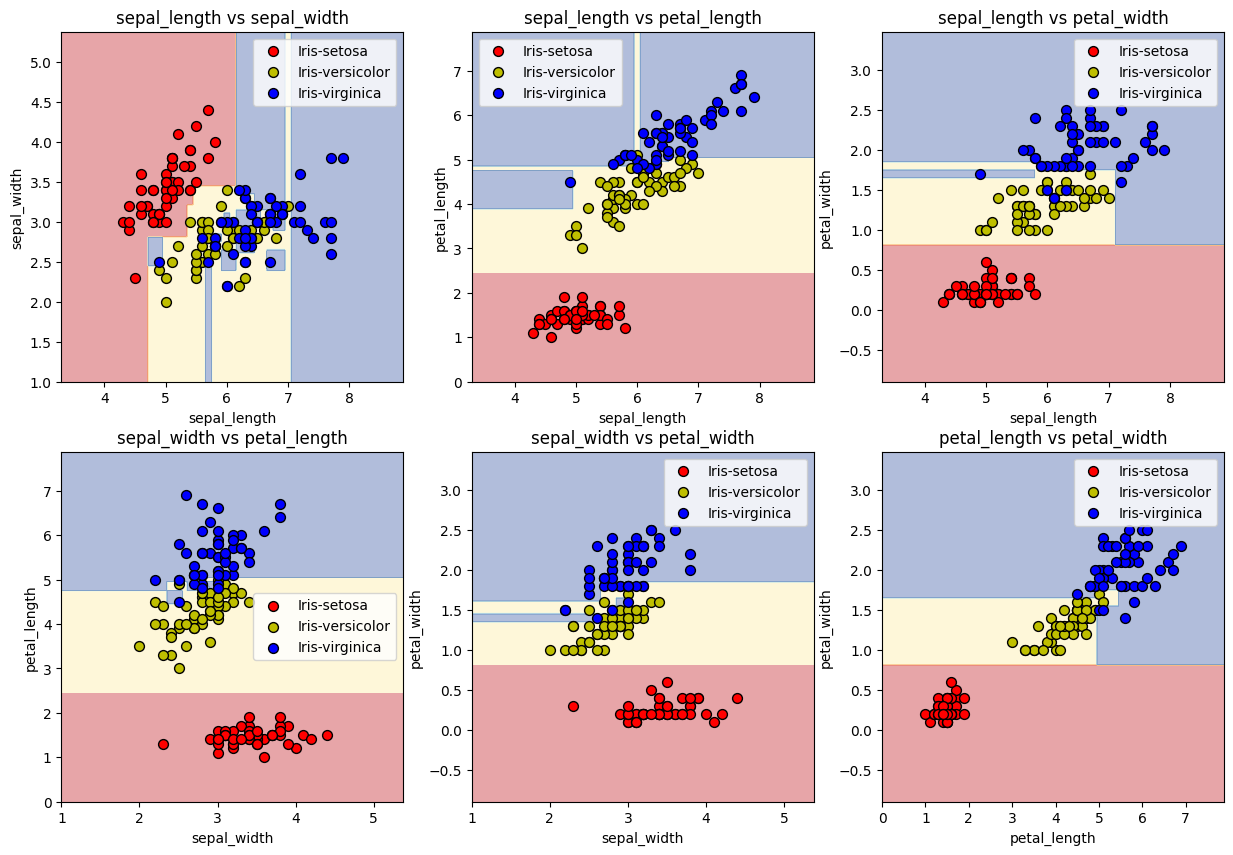

In [14]:
plt.figure(figsize=(15, 10))
pairs = list(combinations(range(4), 2))

for i, pair in enumerate(pairs):
    X_pair = X[:, pair]
    clf = DecisionTreeClassifier().fit(X_pair, y)


    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4)


    for idx, color in zip(range(3), plot_colors):
        plt.scatter(X_pair[y == idx, 0], X_pair[y == idx, 1],
                    c=color, label=target_names[idx],
                    edgecolor='black', s=50)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.title(f"{feature_names[pair[0]]} vs {feature_names[pair[1]]}")
    plt.legend()

Text(0.5, 1.0, 'Decision Tree Trained on All Features')

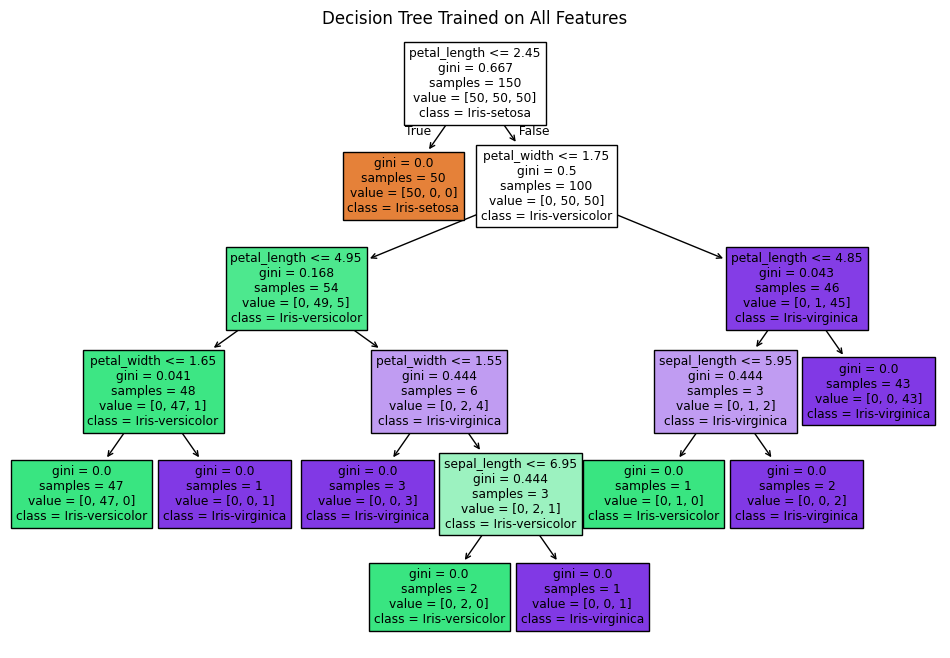

In [15]:
clf_all = DecisionTreeClassifier().fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(clf_all, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Trained on All Features")

In [16]:
plt.show()